In [121]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

Saving image to: image_processed/moon_filtered.png


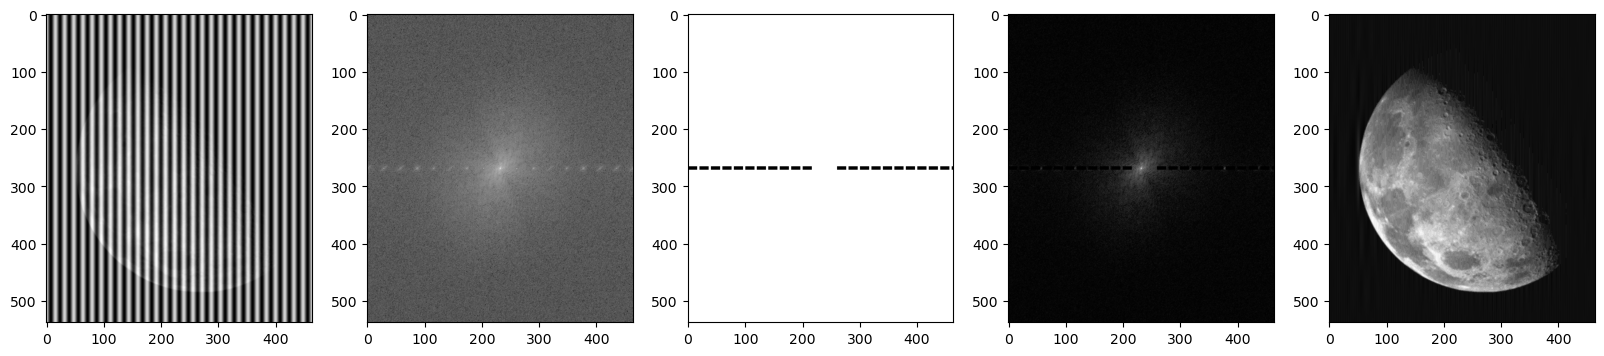

In [122]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    im_filtered = im

    #create the Kernel: 
    #plan was to match the dots, ended up simply using a line (created by overlapping the dots)
    height, width = im.shape
    dot_size = 5
    dot_period = 20
    mid_size = 10
    # offset =int(dot_period/4)
    offset=11
    v_line_filter = np.ones_like(im)

    for i in range(0, width, dot_period):
        for j in range (dot_size+1):
            #check if we are in the middle of the image
            if i not in range(width//2-mid_size-offset//2, width//2 + mid_size+offset//2):
                v_line_filter[height//2-dot_size+2+j, i:offset+i+dot_size]=0

    # v_line_filter[height // 2 - v_line_width // 2 : height //2 + v_line_width //2, :] =0 


    fft_kernel = v_line_filter
    # fft_kernel = np.fft.fft2(kernel, s=fft_im.shape)

    fft_im = np.fft.fft2(im)


    # fft_kernel = np.fft.fft2(kernel, s=fft_im.shape)
    # #centering the fft_image
    centered_fft_im = np.fft.fftshift(fft_im)
    #displaying magnitude for printing image


    magnitude_fft_im = 20*np.log(np.abs(centered_fft_im))



    centered_fft_kernel = np.fft.fftshift(fft_kernel)
    #magnitude_centered_fft_kernel = 20*np.log(1+np.abs(centered_fft_kernel))

    fft_conv_result = centered_fft_im*fft_kernel
    centered_fft_conv_result = np.fft.fftshift(fft_conv_result)
    magnitude_fft_conv_result = 20*np.log(1+np.abs(fft_conv_result))
    

    conv_result = np.fft.ifft2(centered_fft_conv_result).real
    
    im_filtered = conv_result


    # Use plt.subplot to place two or more images beside eachother
    plt.figure(figsize=(20, 4))
    # plt.subplot(num_rows, num_cols, position (1-indexed))
    plt.subplot(1, 5, 1)
    plt.imshow(im, cmap="gray")
    plt.subplot(1, 5, 2) 
    # Visualize FFT
    plt.imshow(magnitude_fft_im, cmap="gray")
    plt.subplot(1, 5, 3)
    # Visualize FFT kernel
    plt.imshow(fft_kernel, cmap= "gray")
    plt.subplot(1, 5, 4)
    # Visualize filtered FFT image
    plt.imshow(magnitude_fft_conv_result, cmap = "gray")
    plt.subplot(1, 5, 5) 
    # Visualize filtered spatial image
    plt.imshow(conv_result, cmap="gray")
    
    

    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))